In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.make_comparison_panel import make_comparison_panel

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x1201fbea0> (1 process) ...
Computing MoEs with 10 samplings ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	4/10 ...
	7/10 ...
	10/10 ...
	10/10 - done.


,Score,0.95 MoE,P-Value,FDR
Gene Set,,,,
GO_14_3_3_PROTEIN_BINDING,0.523070,0.185265,0.133333,0.533333
ONGUSAHA_TP53_TARGETS,0.188894,0.235369,0.466667,0.840000
GO_NEURON_CELL_CELL_ADHESION,-0.658196,0.188221,0.022222,0.100000
GO_SH2_DOMAIN_BINDING,0.396716,0.167085,0.177778,0.533333
YAP signature based on cell NIH3T3_MCD10A in paper GENES & DEVELOPMENT 22:1962–1971 2008,0.865167,0.172696,0.011111,0.100000
YAP signature based on mechanism,-0.865856,0.160829,0.011111,0.100000
BIOCARTA_RHO_PATHWAY,-0.373638,0.167837,0.111111,0.250000
VANTVEER_BREAST_CANCER_BRCA1_UP,-0.404066,0.279272,0.088889,0.250000
"YAP signature based on cell HEK293 in paper Cell 150, 780–791, August 17, 2012",0.283160,0.304364,0.300000,0.675000


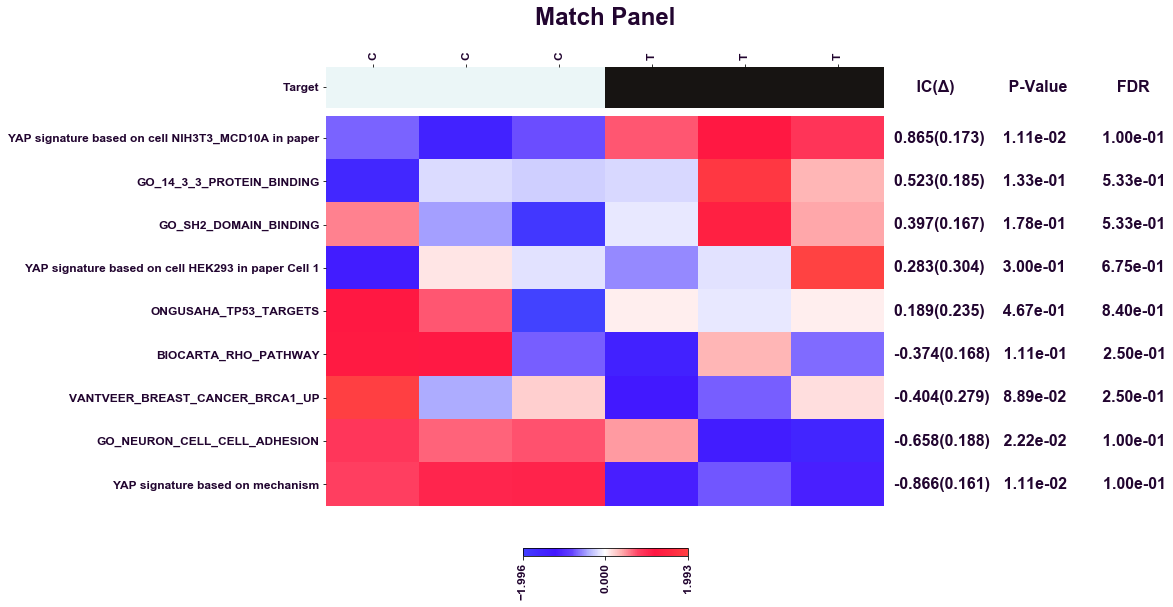

In [3]:
features = pd.read_table('gene_set_x_sample.tsv', index_col=0)

target = pd.Series(
    (0, ) * 3 + (1, ) * 3, name='Target', index=features.columns)
target.index.name = 'Index Name (should not be plotted)'

make_match_panel(
    target,
    features,
    target_ascending=True,
    target_type='binary',
    target_xticklabels=('C', ) * 3 + ('T', ) * 3,
    file_path_prefix='file_path_prefix')

In [4]:
target = pd.read_table('target.tsv', index_col=0, header=None, squeeze=True)
target.name = 'Target Name'

features = pd.read_table('features.tsv', index_col=0)

make_match_panel(
    target,
    features,
    n_top_feature=3,
    max_n_feature=5,
    n_sampling=0,
    n_permutation=0)

Dropping 0 axis-1 slices ...
Computing match score with <function compute_information_coefficient at 0x1201fbea0> (1 process) ...
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.
There is less than 5 samples after dropping nans.


ValueError: Cannot normalize array_2d because it has nan.

In [ ]:
n_row = 100
n_column = 100

In [ ]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_continuous)

In [ ]:
features_categorical = pd.DataFrame(
    np.random.random_integers(0, 5, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_categorical, features_type='categorical')

In [ ]:
features_binary = pd.DataFrame(
    np.random.random_integers(0, 1, size=(
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

make_match_panel(target, features_binary, features_type='binary')

In [ ]:
features_with_missing = features_continuous.copy()
features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n_column // 3),
    np.random.choice(features_with_missing.columns, size=n_column // 3)] = None

make_match_panel(target, features_with_missing)

In [ ]:
features = pd.DataFrame(
    np.random.random_sample((
        n_row,
        3, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(3)))

target = pd.Series(
    (
        0,
        1,
        0, ), name='Target Name', index=features.columns)

make_match_panel(
    target,
    features,
    target_ascending=None,
    target_type='binary',
    min_n_sample=3,
    target_xticklabels=(
        'Low',
        'High',
        'Low', ))

In [ ]:
target = pd.Series(
    np.random.random_sample(n_column),
    name='Target Name',
    index=('Sample {}'.format(i) for i in range(n_column)))

features_continuous = pd.DataFrame(
    np.random.random_sample((
        n_row,
        n_column, )),
    index=('Feature {}'.format(i) for i in range(n_row)),
    columns=('Sample {}'.format(i) for i in range(n_column)))

n = 3

multiple_features = {
    'Continuous features': {
        'df': features_continuous.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'continuous',
    },
    'Categorical features': {
        'df': features_categorical.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'categorical',
    },
    'Binary features': {
        'df': features_binary.iloc[:n, :],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'high',
        'data_type': 'binary',
    },
    'Cotinuous features (missing last 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, :-10],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
    'Cotinuous features (missing first 10 & scores ascending)': {
        'df': features_continuous.iloc[:n, 10:],
        'indices': ['Feature {}'.format(i) for i in range(n)],
        'index_aliases': ['Alias {}'.format(i) for i in range(n)],
        'emphasis': 'low',
        'data_type': 'continuous',
    },
}

In [ ]:
make_summary_match_panel(
    target,
    multiple_features,
    title='Default',
    plot_column_names=True,
    file_path='file_path')

In [ ]:
make_summary_match_panel(
    target,
    multiple_features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only Columns Shared by Target and All Features',
    plot_column_names=True)

In [ ]:
array_2d_0 = np.random.random_sample((
    n_row,
    2, ))

array_2d_1 = np.random.random_sample((
    n_row,
    8, ))

make_comparison_panel(
    array_2d_0,
    array_2d_1,
    array_2d_0_name='ND Array 0',
    array_2d_1_name='ND Array 1')